In [24]:
import matplotlib.pyplot as plt

# Data for the plot
metrics = ["DenseNet121", "ViT-IN1K", "Swin-IN22K", "Swin-SimMIM"]
latency_values = [137, 742, 769, 769]
auc_values = [0.801, 0.791, 0.753, 0.831]
peak_mem_alloc_values = [3410, 2900, 8095, 8095]
latency_std = [29, 4, 5, 4]  # Standard deviation for latency

# Colors
line_color = '#FFAFCC'
bar_color = '#BAA4C7'

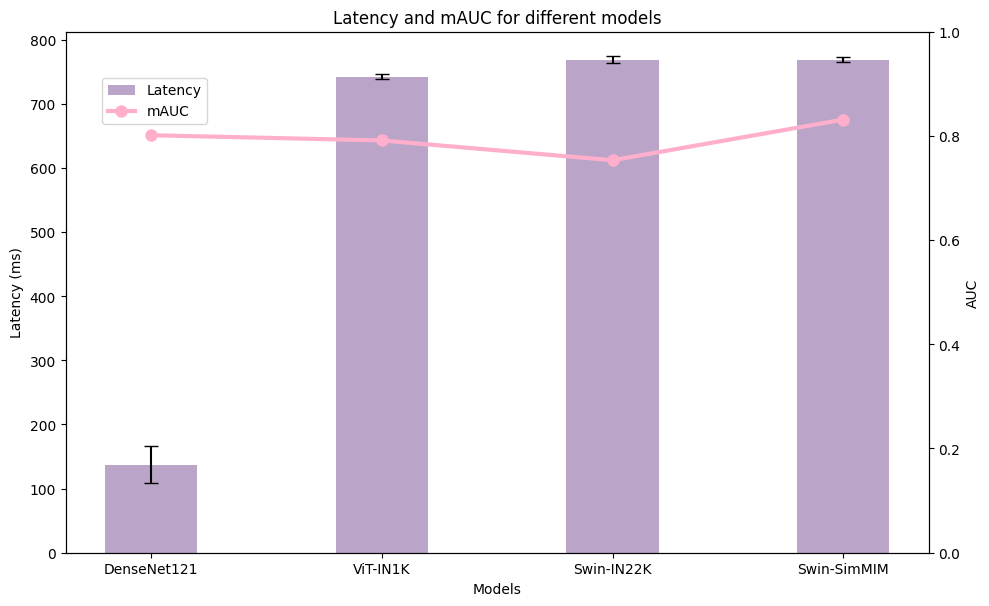

In [27]:

fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.4
opacity = 1

ax1.set_xlabel('Models')
ax1.set_ylabel('Latency (ms)')
bars = ax1.bar(metrics, latency_values, bar_width, alpha=opacity, color=bar_color, yerr=latency_std, capsize=5, label='Latency')
ax1.tick_params(axis='y')

# Plotting AUC as line
ax2 = ax1.twinx()
ax2.set_ylabel('AUC')
ax2.plot(metrics, auc_values, color=line_color, marker='o', linestyle='-', linewidth=3, markersize=8, label='mAUC')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.title('Latency and mAUC for different models')
plt.savefig("latency-mauc.png")


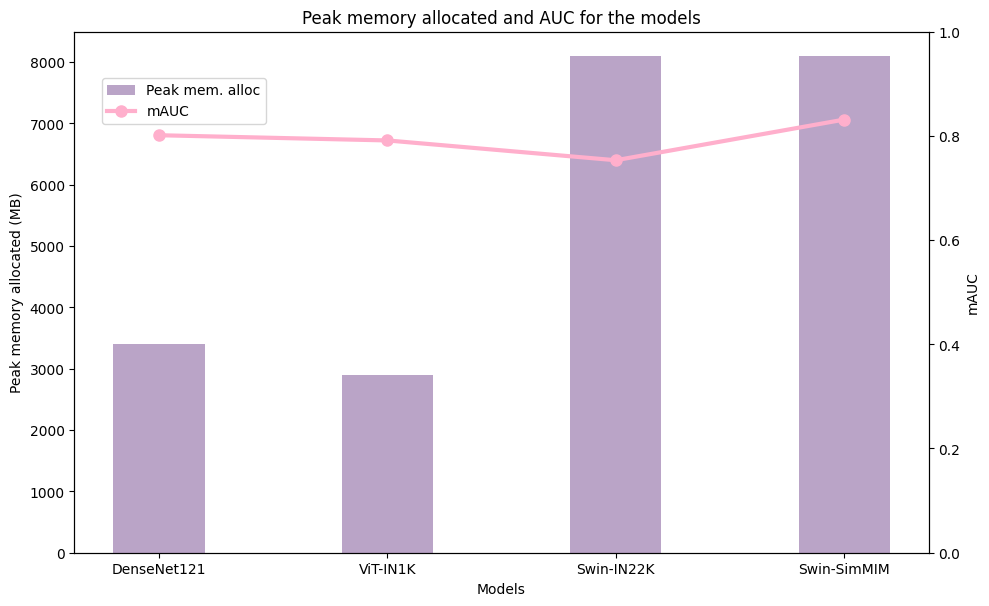

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.4
opacity = 1

ax1.set_xlabel('Models')
ax1.set_ylabel('Peak memory allocated (MB)')
bars = ax1.bar(metrics, peak_mem_alloc_values, bar_width, alpha=opacity, color=bar_color, label='Peak mem. alloc')
ax1.tick_params(axis='y')

# Plotting AUC as line
ax2 = ax1.twinx()
ax2.set_ylabel('mAUC')
ax2.plot(metrics, auc_values, color=line_color, marker='o', linestyle='-', linewidth=3, markersize=8, label='mAUC')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 1)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.title('Peak memory allocated and AUC for the models')
plt.savefig("peak-mem-alloc-auc.png")
